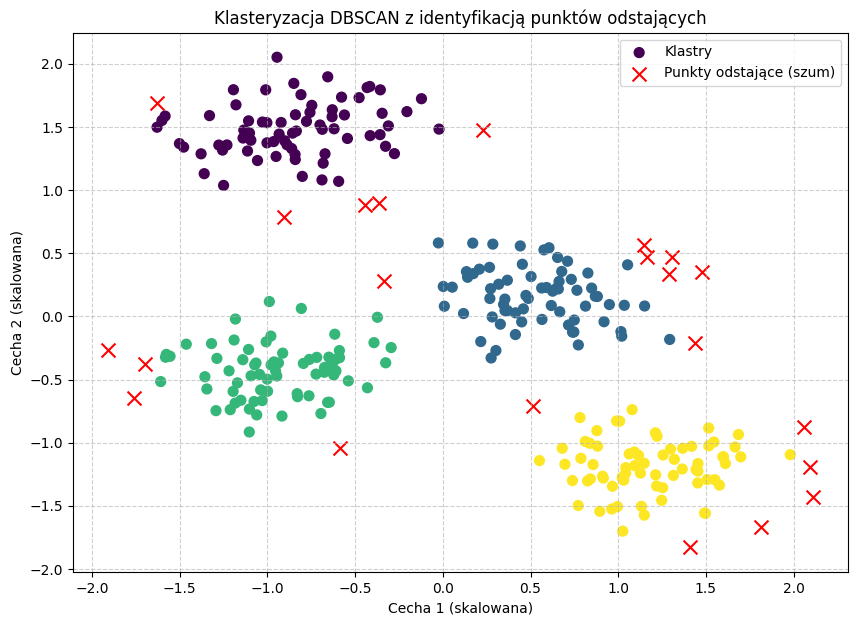

Liczba oszacowanych klastrów: 4
Liczba punktów odstających: 22


In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

plt.figure(figsize=(10, 7))

outliers = X[labels == -1]
clusters = X[labels != -1]
cluster_labels = labels[labels != -1]

plt.scatter(clusters[:, 0], clusters[:, 1], c=cluster_labels, cmap='viridis', s=50, label='Klastry')

plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', s=100, label='Punkty odstające (szum)')

plt.title('Klasteryzacja DBSCAN z identyfikacją punktów odstających')
plt.xlabel('Cecha 1 (skalowana)')
plt.ylabel('Cecha 2 (skalowana)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f"Liczba oszacowanych klastrów: {n_clusters_}")
print(f"Liczba punktów odstających: {n_noise_}")